## Dataset
## Weather data from 2012 to 2017 accross different cities in the US and Canada

In [1]:
import pandas as pd
from datetime import datetime, time, date
from matplotlib import pyplot as plt
import time
import calendar
import seaborn as sns
import numpy as np

## Project Goal
To analyze wind data and identify the best seasons and cities to sail

In [2]:
wind_speed = pd.read_csv('archive/wind_speed.csv')

In [3]:
wind_speed

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,2.0,NaN,4.0,1.0,2.0,1.0,3.0,1.0,...,5.0,NaN,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,...,5.0,NaN,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,1.0,NaN,5.0,1.0,2.0,1.0,2.0,1.0,...,3.0,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,2.0,NaN,3.0,2.0,2.0,0.0,3.0,1.0,...,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Dropping rows where data is not available
wind_speed.dropna(inplace=True)

In [5]:
wind_speed

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
5,2012-10-01 17:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,6.0,3.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,2.0,6.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,...,4.0,3.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0
44457,2017-10-27 21:00:00,2.0,8.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,...,4.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,3.0,1.0
44458,2017-10-27 22:00:00,4.0,8.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,...,3.0,2.0,2.0,2.0,1.0,1.0,5.0,3.0,3.0,1.0
44459,2017-10-27 23:00:00,0.0,6.0,2.0,3.0,2.0,4.0,2.0,2.0,1.0,...,2.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0


In [6]:
# Getting familiar with the columns data types
wind_speed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44426 entries, 1 to 44460
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           44426 non-null  object 
 1   Vancouver          44426 non-null  float64
 2   Portland           44426 non-null  float64
 3   San Francisco      44426 non-null  float64
 4   Seattle            44426 non-null  float64
 5   Los Angeles        44426 non-null  float64
 6   San Diego          44426 non-null  float64
 7   Las Vegas          44426 non-null  float64
 8   Phoenix            44426 non-null  float64
 9   Albuquerque        44426 non-null  float64
 10  Denver             44426 non-null  float64
 11  San Antonio        44426 non-null  float64
 12  Dallas             44426 non-null  float64
 13  Houston            44426 non-null  float64
 14  Kansas City        44426 non-null  float64
 15  Minneapolis        44426 non-null  float64
 16  Saint Louis        444

In [6]:
# Change datetime column from object to datetime
wind_speed['datetime'] = pd.to_datetime(wind_speed['datetime'])

In [7]:
wind_speed[['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44426 entries, 1 to 44460
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  44426 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 694.2 KB


For my analysis, I am using a subset of the data: wind data in 2017

In [8]:
wind_speed.where(wind_speed['datetime'] >= '2017-01-01 00:00:00', inplace=True)

In [9]:
#Dropping the NA rows after running "Where" method 
wind_speed.dropna(inplace=True)

In [10]:
wind_speed

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
37260,2017-01-01 00:00:00,5.0,3.0,2.0,5.0,3.0,3.0,1.0,1.0,6.0,...,6.0,4.0,5.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
37261,2017-01-01 01:00:00,5.0,2.0,1.0,5.0,4.0,4.0,1.0,1.0,4.0,...,4.0,4.0,5.0,4.0,0.0,2.0,3.0,1.0,1.0,2.0
37262,2017-01-01 02:00:00,7.0,3.0,2.0,5.0,2.0,5.0,1.0,1.0,5.0,...,5.0,3.0,3.0,5.0,1.0,1.0,2.0,3.0,3.0,1.0
37263,2017-01-01 03:00:00,5.0,2.0,3.0,3.0,1.0,4.0,1.0,1.0,2.0,...,7.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,3.0,1.0
37264,2017-01-01 04:00:00,3.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,...,4.0,1.0,2.0,3.0,1.0,3.0,5.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,2.0,6.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,...,4.0,3.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0
44457,2017-10-27 21:00:00,2.0,8.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,...,4.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,3.0,1.0
44458,2017-10-27 22:00:00,4.0,8.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,...,3.0,2.0,2.0,2.0,1.0,1.0,5.0,3.0,3.0,1.0
44459,2017-10-27 23:00:00,0.0,6.0,2.0,3.0,2.0,4.0,2.0,2.0,1.0,...,2.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0


In [11]:
# Create time column
wind_speed['time_of_day'] = wind_speed['datetime'].apply(lambda x: x.time())

In [12]:
# Create month column
wind_speed['month'] = wind_speed['datetime'].apply(lambda x: x.month)

In [13]:
# Create day column
wind_speed['day'] = wind_speed['datetime'].apply(lambda x: x.date())

In [14]:
wind_speed

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,time_of_day,month,day
37260,2017-01-01 00:00:00,5.0,3.0,2.0,5.0,3.0,3.0,1.0,1.0,6.0,...,2.0,0.0,1.0,3.0,1.0,1.0,1.0,00:00:00,1,2017-01-01
37261,2017-01-01 01:00:00,5.0,2.0,1.0,5.0,4.0,4.0,1.0,1.0,4.0,...,4.0,0.0,2.0,3.0,1.0,1.0,2.0,01:00:00,1,2017-01-01
37262,2017-01-01 02:00:00,7.0,3.0,2.0,5.0,2.0,5.0,1.0,1.0,5.0,...,5.0,1.0,1.0,2.0,3.0,3.0,1.0,02:00:00,1,2017-01-01
37263,2017-01-01 03:00:00,5.0,2.0,3.0,3.0,1.0,4.0,1.0,1.0,2.0,...,4.0,1.0,1.0,2.0,3.0,3.0,1.0,03:00:00,1,2017-01-01
37264,2017-01-01 04:00:00,3.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,...,3.0,1.0,3.0,5.0,3.0,3.0,3.0,04:00:00,1,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44456,2017-10-27 20:00:00,2.0,6.0,0.0,2.0,0.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,3.0,3.0,3.0,1.0,20:00:00,10,2017-10-27
44457,2017-10-27 21:00:00,2.0,8.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,...,1.0,1.0,1.0,5.0,3.0,3.0,1.0,21:00:00,10,2017-10-27
44458,2017-10-27 22:00:00,4.0,8.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,...,2.0,1.0,1.0,5.0,3.0,3.0,1.0,22:00:00,10,2017-10-27
44459,2017-10-27 23:00:00,0.0,6.0,2.0,3.0,2.0,4.0,2.0,2.0,1.0,...,1.0,1.0,3.0,1.0,1.0,1.0,3.0,23:00:00,10,2017-10-27


In [15]:
# List of cities to use for my analysis
column_selection = ['datetime','time_of_day','day', 'month','Vancouver', 'Portland', 'San Francisco', 'Seattle','San Diego', 'Chicago', 'Detroit', 'Jacksonville', 'Miami', 'New York']

In [16]:
# Changed the format of the table
wind_speed_updated = pd.melt(wind_speed[column_selection], id_vars=['month', 'day', 'time_of_day'], value_vars=['Vancouver', 'Portland', 'San Francisco', 'Seattle','San Diego', 'Chicago', 'Detroit', 'Jacksonville', 'Miami', 'New York'])

In [17]:
wind_speed_updated

,month,day,time_of_day,variable,value
0,1,2017-01-01,00:00:00,Vancouver,5.0
1,1,2017-01-01,01:00:00,Vancouver,5.0
2,1,2017-01-01,02:00:00,Vancouver,7.0
3,1,2017-01-01,03:00:00,Vancouver,5.0
4,1,2017-01-01,04:00:00,Vancouver,3.0
...,...,...,...,...,...
71865,10,2017-10-27,20:00:00,New York,3.0
71866,10,2017-10-27,21:00:00,New York,1.0
71867,10,2017-10-27,22:00:00,New York,2.0
71868,10,2017-10-27,23:00:00,New York,3.0


In [18]:
wind_speed_updated.rename(columns={'variable': 'City', 'value': 'Wind Speed'}, inplace=True)

In [19]:
wind_speed_updated

,month,day,time_of_day,City,Wind Speed
0,1,2017-01-01,00:00:00,Vancouver,5.0
1,1,2017-01-01,01:00:00,Vancouver,5.0
2,1,2017-01-01,02:00:00,Vancouver,7.0
3,1,2017-01-01,03:00:00,Vancouver,5.0
4,1,2017-01-01,04:00:00,Vancouver,3.0
...,...,...,...,...,...
71865,10,2017-10-27,20:00:00,New York,3.0
71866,10,2017-10-27,21:00:00,New York,1.0
71867,10,2017-10-27,22:00:00,New York,2.0
71868,10,2017-10-27,23:00:00,New York,3.0


In [20]:
# Defined fair wind condition
wind_speed_updated['FairWind'] = (wind_speed_updated['Wind Speed'] >= 8) & (wind_speed_updated['Wind Speed'] <= 20)

In [21]:
wind_speed_updated

,month,day,time_of_day,City,Wind Speed,FairWind
0,1,2017-01-01,00:00:00,Vancouver,5.0,False
1,1,2017-01-01,01:00:00,Vancouver,5.0,False
2,1,2017-01-01,02:00:00,Vancouver,7.0,False
3,1,2017-01-01,03:00:00,Vancouver,5.0,False
4,1,2017-01-01,04:00:00,Vancouver,3.0,False
...,...,...,...,...,...,...
71865,10,2017-10-27,20:00:00,New York,3.0,False
71866,10,2017-10-27,21:00:00,New York,1.0,False
71867,10,2017-10-27,22:00:00,New York,2.0,False
71868,10,2017-10-27,23:00:00,New York,3.0,False


In [22]:
wind_speed_updated[wind_speed_updated['FairWind'] == True]

,month,day,time_of_day,City,Wind Speed,FairWind
138,1,2017-01-06,18:00:00,Vancouver,8.0,True
204,1,2017-01-09,12:00:00,Vancouver,9.0,True
240,1,2017-01-11,00:00:00,Vancouver,8.0,True
242,1,2017-01-11,02:00:00,Vancouver,14.0,True
243,1,2017-01-11,03:00:00,Vancouver,12.0,True
...,...,...,...,...,...,...
71776,10,2017-10-24,03:00:00,New York,8.0,True
71788,10,2017-10-24,15:00:00,New York,9.0,True
71792,10,2017-10-24,19:00:00,New York,10.0,True
71793,10,2017-10-24,20:00:00,New York,9.0,True


In [23]:
# Created a new column to reflect the month name
wind_speed_updated['month_name'] = wind_speed_updated['month'].apply(lambda x: calendar.month_abbr[x])

In [24]:
wind_speed_updated

,month,day,time_of_day,City,Wind Speed,FairWind,month_name
0,1,2017-01-01,00:00:00,Vancouver,5.0,False,Jan
1,1,2017-01-01,01:00:00,Vancouver,5.0,False,Jan
2,1,2017-01-01,02:00:00,Vancouver,7.0,False,Jan
3,1,2017-01-01,03:00:00,Vancouver,5.0,False,Jan
4,1,2017-01-01,04:00:00,Vancouver,3.0,False,Jan
...,...,...,...,...,...,...,...
71865,10,2017-10-27,20:00:00,New York,3.0,False,Oct
71866,10,2017-10-27,21:00:00,New York,1.0,False,Oct
71867,10,2017-10-27,22:00:00,New York,2.0,False,Oct
71868,10,2017-10-27,23:00:00,New York,3.0,False,Oct


In [26]:
# Number of hours of fair wind per day
fair_wind_hours_count = wind_speed_updated[wind_speed_updated['FairWind'] ==True].groupby(['City', 'day', 'month_name']).count()

In [27]:
# Created a dataframe with the number of days with fair wind aggregated by month and city
groupy = fair_wind_hours_count.groupby('City')
cities = pd.DataFrame()
for city in groupy.groups:
    temp = pd.DataFrame()
    months = groupy.get_group(city).groupby('month_name')
    for month in months.groups:
        maxes = months.get_group(month).groupby('day').agg({'Wind Speed': 'max'})
        temp[month] = maxes.count()
    cities[city] = temp.loc['Wind Speed']

In [28]:
cities

,Chicago,Detroit,Jacksonville,Miami,New York,Portland,San Diego,San Francisco,Seattle,Vancouver
Apr,17,12,9,14,15,6.0,1.0,22,3.0,8
Aug,5,2,2,4,1,1.0,NaN,6,NaN,4
Feb,13,10,7,6,9,6.0,3.0,13,2.0,3
Jan,11,9,6,9,12,7.0,6.0,14,NaN,5
Jul,5,1,6,4,1,3.0,NaN,3,NaN,9
Jun,18,8,3,5,7,2.0,NaN,8,NaN,4
Mar,21,13,10,10,17,9.0,1.0,18,7.0,5
May,20,10,8,10,9,3.0,1.0,19,NaN,3
Oct,11,8,9,14,3,4.0,NaN,1,7.0,4
Sep,5,2,6,4,2,NaN,NaN,10,1.0,3


In [29]:
# Changed the format of the dataframe
cities = cities.transpose()

In [30]:
cities

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Oct,Sep
Chicago,17.0,5.0,13.0,11.0,5.0,18.0,21.0,20.0,11.0,5.0
Detroit,12.0,2.0,10.0,9.0,1.0,8.0,13.0,10.0,8.0,2.0
Jacksonville,9.0,2.0,7.0,6.0,6.0,3.0,10.0,8.0,9.0,6.0
Miami,14.0,4.0,6.0,9.0,4.0,5.0,10.0,10.0,14.0,4.0
New York,15.0,1.0,9.0,12.0,1.0,7.0,17.0,9.0,3.0,2.0
Portland,6.0,1.0,6.0,7.0,3.0,2.0,9.0,3.0,4.0,NaN
San Diego,1.0,NaN,3.0,6.0,NaN,NaN,1.0,1.0,NaN,NaN
San Francisco,22.0,6.0,13.0,14.0,3.0,8.0,18.0,19.0,1.0,10.0
Seattle,3.0,NaN,2.0,NaN,NaN,NaN,7.0,NaN,7.0,1.0
Vancouver,8.0,4.0,3.0,5.0,9.0,4.0,5.0,3.0,4.0,3.0


In [31]:
# Reordered the columns
cities[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct
Chicago,11.0,13.0,21.0,17.0,20.0,18.0,5.0,5.0,5.0,11.0
Detroit,9.0,10.0,13.0,12.0,10.0,8.0,1.0,2.0,2.0,8.0
Jacksonville,6.0,7.0,10.0,9.0,8.0,3.0,6.0,2.0,6.0,9.0
Miami,9.0,6.0,10.0,14.0,10.0,5.0,4.0,4.0,4.0,14.0
New York,12.0,9.0,17.0,15.0,9.0,7.0,1.0,1.0,2.0,3.0
Portland,7.0,6.0,9.0,6.0,3.0,2.0,3.0,1.0,NaN,4.0
San Diego,6.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
San Francisco,14.0,13.0,18.0,22.0,19.0,8.0,3.0,6.0,10.0,1.0
Seattle,NaN,2.0,7.0,3.0,NaN,NaN,NaN,NaN,1.0,7.0
Vancouver,5.0,3.0,5.0,8.0,3.0,4.0,9.0,4.0,3.0,4.0


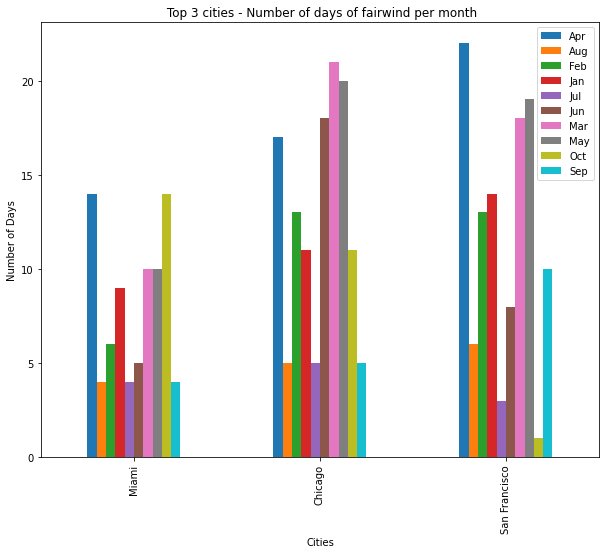

In [65]:
cities.loc[['Chicago', 'San Francisco', 'Miami']].sort_values(by=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']).plot.bar(figsize=(10,8))
plt.xlabel('Cities')
plt.ylabel('Number of Days')
plt.title(' Top 3 cities - Number of days of fairwind per month')
plt.show()

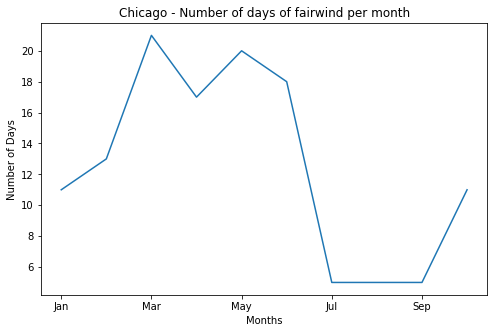

In [66]:
cities[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']].loc['Chicago'].plot(figsize=(8,5))
plt.xlabel('Months')
plt.ylabel('Number of Days')
plt.title('Chicago - Number of days of fairwind per month')
plt.show()

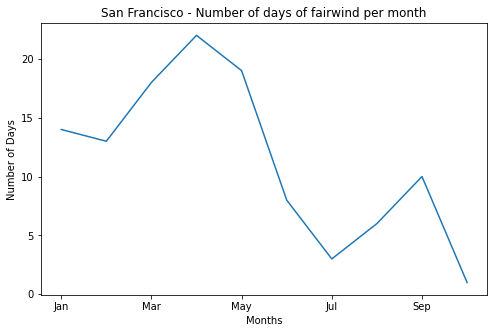

In [62]:
cities[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']].loc['San Francisco'].plot(figsize=(8,5))
plt.xlabel('Months')
plt.ylabel('Number of Days')
plt.title('San Francisco - Number of days of fairwind per month')
plt.show()

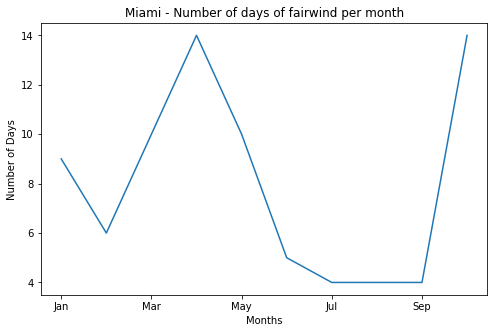

In [61]:
cities[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']].loc['Miami'].plot(figsize=(8,5))
plt.xlabel('Months')
plt.ylabel('Number of Days')
plt.title('Miami - Number of days of fairwind per month')
plt.show()

In [165]:
cities.transpose()

,Chicago,Detroit,Jacksonville,Miami,New York,Portland,San Diego,San Francisco,Seattle,Vancouver
Apr,17.0,12.0,9.0,14.0,15.0,6.0,1.0,22.0,3.0,8.0
Aug,5.0,2.0,2.0,4.0,1.0,1.0,NaN,6.0,NaN,4.0
Feb,13.0,10.0,7.0,6.0,9.0,6.0,3.0,13.0,2.0,3.0
Jan,11.0,9.0,6.0,9.0,12.0,7.0,6.0,14.0,NaN,5.0
Jul,5.0,1.0,6.0,4.0,1.0,3.0,NaN,3.0,NaN,9.0
Jun,18.0,8.0,3.0,5.0,7.0,2.0,NaN,8.0,NaN,4.0
Mar,21.0,13.0,10.0,10.0,17.0,9.0,1.0,18.0,7.0,5.0
May,20.0,10.0,8.0,10.0,9.0,3.0,1.0,19.0,NaN,3.0
Oct,11.0,8.0,9.0,14.0,3.0,4.0,NaN,1.0,7.0,4.0
Sep,5.0,2.0,6.0,4.0,2.0,NaN,NaN,10.0,1.0,3.0


In [184]:
cities

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Oct,Sep
Chicago,17.0,5.0,13.0,11.0,5.0,18.0,21.0,20.0,11.0,5.0
Detroit,12.0,2.0,10.0,9.0,1.0,8.0,13.0,10.0,8.0,2.0
Jacksonville,9.0,2.0,7.0,6.0,6.0,3.0,10.0,8.0,9.0,6.0
Miami,14.0,4.0,6.0,9.0,4.0,5.0,10.0,10.0,14.0,4.0
New York,15.0,1.0,9.0,12.0,1.0,7.0,17.0,9.0,3.0,2.0
Portland,6.0,1.0,6.0,7.0,3.0,2.0,9.0,3.0,4.0,NaN
San Diego,1.0,NaN,3.0,6.0,NaN,NaN,1.0,1.0,NaN,NaN
San Francisco,22.0,6.0,13.0,14.0,3.0,8.0,18.0,19.0,1.0,10.0
Seattle,3.0,NaN,2.0,NaN,NaN,NaN,7.0,NaN,7.0,1.0
Vancouver,8.0,4.0,3.0,5.0,9.0,4.0,5.0,3.0,4.0,3.0


In [39]:
# Sum of number of days with fair wind per city
cities.sum(axis=1).sort_values(ascending=False)

Chicago          126.0
San Francisco    114.0
Miami             80.0
New York          76.0
Detroit           75.0
Jacksonville      66.0
Vancouver         48.0
Portland          41.0
Seattle           20.0
San Diego         12.0
dtype: float64

In [221]:
cities.reset_index()

,index,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Oct,Sep
0,Chicago,17.0,5.0,13.0,11.0,5.0,18.0,21.0,20.0,11.0,5.0
1,Detroit,12.0,2.0,10.0,9.0,1.0,8.0,13.0,10.0,8.0,2.0
2,Jacksonville,9.0,2.0,7.0,6.0,6.0,3.0,10.0,8.0,9.0,6.0
3,Miami,14.0,4.0,6.0,9.0,4.0,5.0,10.0,10.0,14.0,4.0
4,New York,15.0,1.0,9.0,12.0,1.0,7.0,17.0,9.0,3.0,2.0
5,Portland,6.0,1.0,6.0,7.0,3.0,2.0,9.0,3.0,4.0,NaN
6,San Diego,1.0,NaN,3.0,6.0,NaN,NaN,1.0,1.0,NaN,NaN
7,San Francisco,22.0,6.0,13.0,14.0,3.0,8.0,18.0,19.0,1.0,10.0
8,Seattle,3.0,NaN,2.0,NaN,NaN,NaN,7.0,NaN,7.0,1.0
9,Vancouver,8.0,4.0,3.0,5.0,9.0,4.0,5.0,3.0,4.0,3.0


In [41]:
cities.transpose()

,Chicago,Detroit,Jacksonville,Miami,New York,Portland,San Diego,San Francisco,Seattle,Vancouver
Apr,17.0,12.0,9.0,14.0,15.0,6.0,1.0,22.0,3.0,8.0
Aug,5.0,2.0,2.0,4.0,1.0,1.0,NaN,6.0,NaN,4.0
Feb,13.0,10.0,7.0,6.0,9.0,6.0,3.0,13.0,2.0,3.0
Jan,11.0,9.0,6.0,9.0,12.0,7.0,6.0,14.0,NaN,5.0
Jul,5.0,1.0,6.0,4.0,1.0,3.0,NaN,3.0,NaN,9.0
Jun,18.0,8.0,3.0,5.0,7.0,2.0,NaN,8.0,NaN,4.0
Mar,21.0,13.0,10.0,10.0,17.0,9.0,1.0,18.0,7.0,5.0
May,20.0,10.0,8.0,10.0,9.0,3.0,1.0,19.0,NaN,3.0
Oct,11.0,8.0,9.0,14.0,3.0,4.0,NaN,1.0,7.0,4.0
Sep,5.0,2.0,6.0,4.0,2.0,NaN,NaN,10.0,1.0,3.0


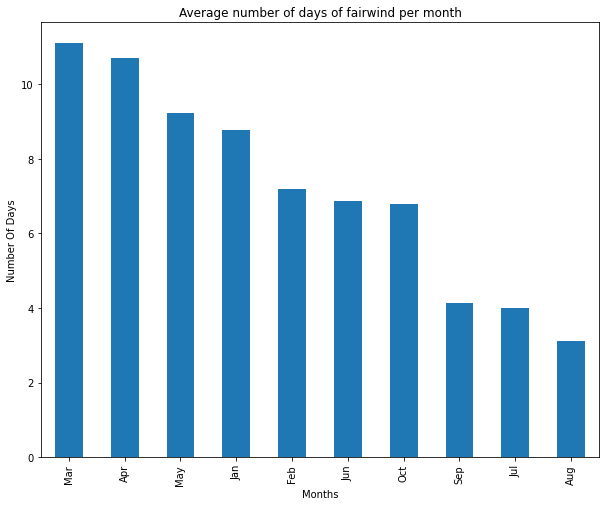

In [58]:
cities.mean(axis=0).sort_values(ascending=False).plot.bar(figsize=(10,8))
plt.xlabel('Months')
plt.ylabel('Number Of Days')
plt.title('Average number of days of fairwind per month')
plt.show()

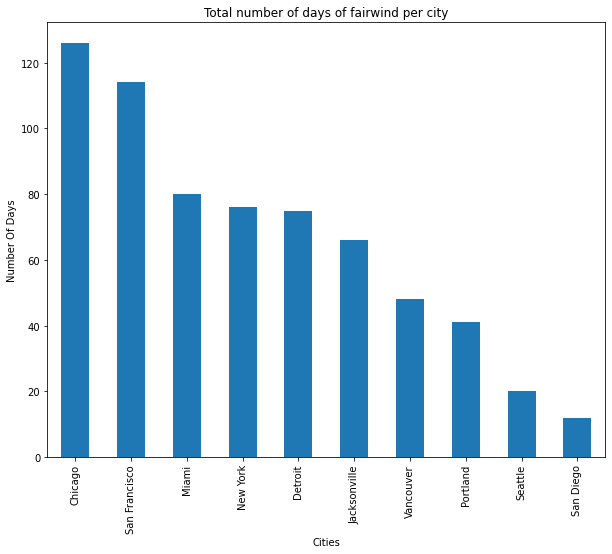

In [57]:
cities.sum(axis=1).sort_values(ascending=False).plot.bar(figsize=(10,8))
plt.xlabel('Cities')
plt.ylabel('Number Of Days')
plt.title('Total number of days of fairwind per city')
plt.show()

### Discovery
* Top 3 cities with the highest number of fairwind days for the year of 2017 are Chicago, San Francisco, and Miami
* Spring is the best season to sail across the US as the months of March, April, and May have the highest number of fairwind sailing days for the year of 2017
* Overall, summer is the worst season to sail across the US as it has the months with the lowest number of days with fairwind

### Discovery
* Chicago, San Francisco, and Miami are the top three cities for sailing in the US
* Spring is the best season to sail across the US as the months of March, April, and May have the highest number of fair wind sailing days for the year of 2017
* Overall, summer is the worst season to sail across the US as it has the lowest number of days with fairwind

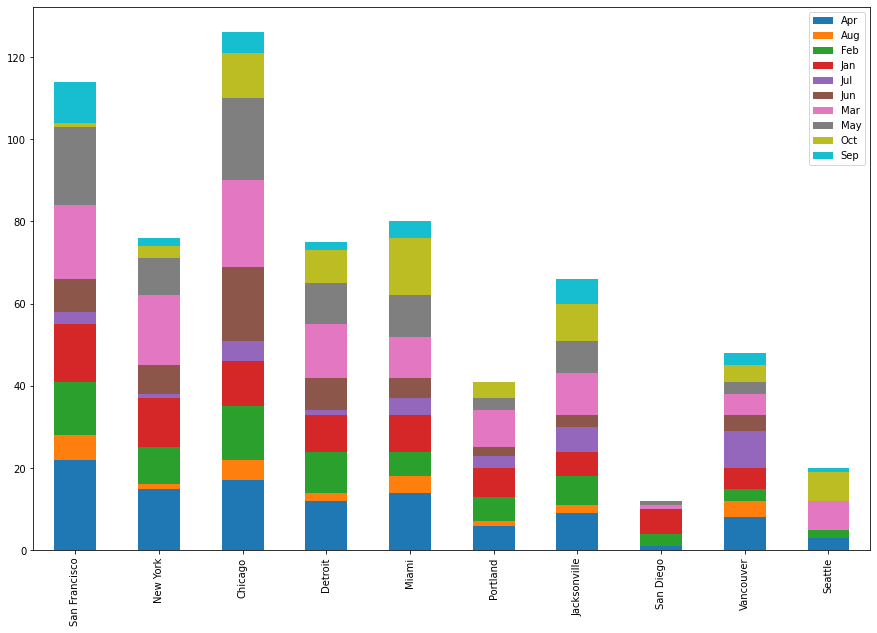

In [54]:
# 
cities.sort_values(by=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], ascending=False).plot.bar(figsize=(15,10),stacked=True)
plt.show()